<a href="https://colab.research.google.com/github/Ar-Ras/dicoding-data-analysis-project/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aria ABdurrahman Airlangga
- **Email:** aria.abdurrahman2@gmail.com
- **ID Dicoding:** aria_ar

## Menentukan Pertanyaan Bisnis

- Bagaimana efek musim terhadap pengendara rental?
- Bagaimana kah 5 besar *peak hour* rental pada setiap musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
""" Initial data importation """
bike_sharing_day = pd.read_csv("dataset/day.csv")
bike_sharing_hour = pd.read_csv("dataset/hour.csv")

#### Bike sharing per day overview

In [3]:
bike_sharing_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Bike sharing per hour overview

In [4]:
bike_sharing_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Bike sharing per day informations

Checks for column's data type, duplicated data, missing value, and dataset's statistic. To be crosschecked with min-max value from dataset's readme:

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [5]:
""" checks for data types, duplicates, and statistics """
bike_sharing_day.info()

print('duplicated data: ', bike_sharing_day.duplicated().sum())
bike_sharing_day.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
duplicated data:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
""" checks for null values """
bike_sharing_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Bike sharing per hour informations

In [7]:
""" checks for data types, duplicates, and statistics """
bike_sharing_hour.info()
print('duplicated data: ', bike_sharing_hour.duplicated().sum())

bike_sharing_hour.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
duplicated data:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
""" checks for null values """
bike_sharing_hour.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

#### Convert data type

In [9]:
bike_sharing_day['dteday'] = pd.to_datetime(bike_sharing_day['dteday'])
bike_sharing_hour['dteday'] = pd.to_datetime(bike_sharing_hour['dteday'])

bike_sharing_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
bike_sharing_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Ranks ridership per season

Fall season (3) has the most ridership

In [11]:
bike_sharing_day.groupby(by='season')['cnt'].sum(True)

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

### Correlation matrix
Useful to determine how the values in each label influence one another

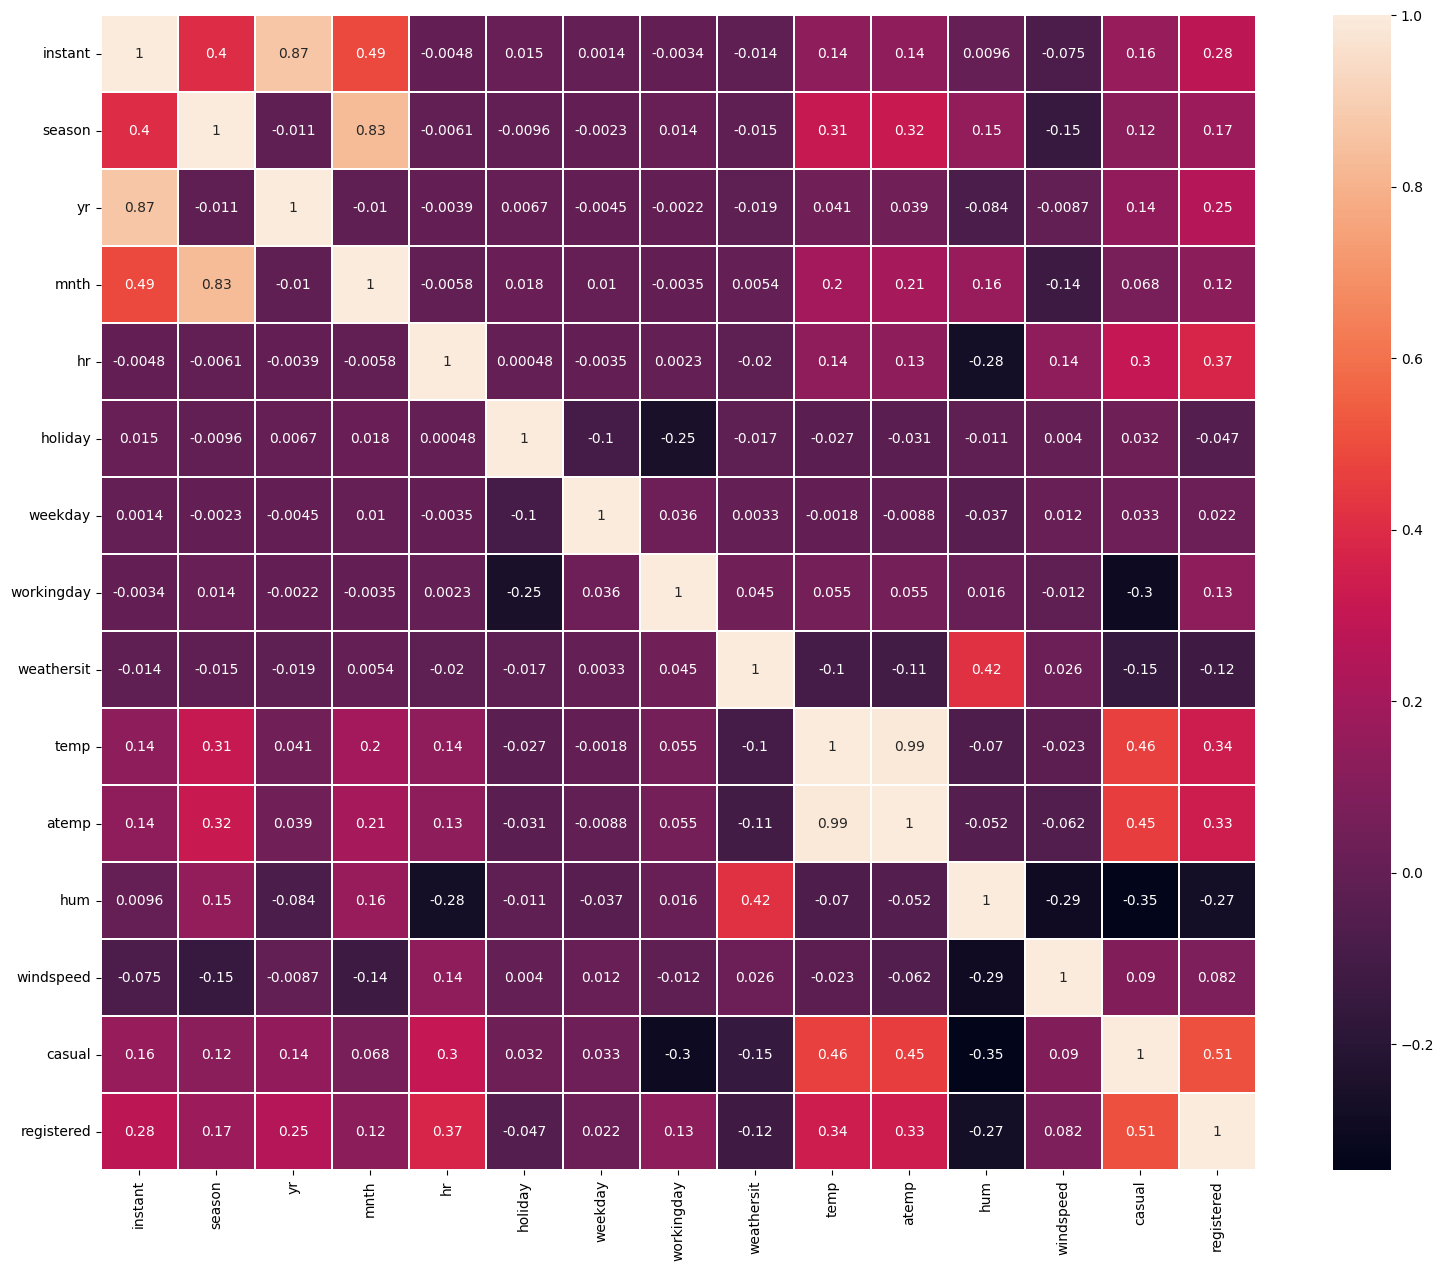

In [23]:
corr = bike_sharing_hour.iloc[:,:-1].corr(method="pearson", numeric_only=True)
plt.subplots(figsize=(20,15))
sns.heatmap(corr, square=True, linewidths=.2, annot=True, fmt='.2g')
plt.show()

### Riders by the hours per season
Then ranked based on 5 highest rider per hour in each season. This will be what's visualized and concluded at the end

In [40]:
print(bike_sharing_hour.groupby(['season', 'hr'])['cnt'].sum(True).to_string())

season  hr
1       0       4878
        1       3229
        2       2175
        3       1108
        4        490
        5       1830
        6       7261
        7      20655
        8      42095
        9      26316
        10     17939
        11     21575
        12     27131
        13     28175
        14     26605
        15     28018
        16     32999
        17     47780
        18     43110
        19     29837
        20     21211
        21     16497
        22     12440
        23      7994
2       0      10459
        1       6481
        2       4302
        3       2084
        4       1118
        5       3508
        6      14549
        7      40753
        8      69945
        9      43053
        10     34919
        11     42585
        12     51252
        13     52022
        14     48903
        15     51382
        16     63831
        17     95468
        18     88904
        19     65994
        20     47285
        21     35246
        22     26885
  

In [70]:
print(bike_sharing_hour.groupby(['season', 'weathersit'])['cnt'].sum(True).to_string())

season  weathersit
1       1             325278
        2             124205
        3              21642
        4                223
2       1             664463
        2             207363
        3              46763
3       1             801941
        2             212932
        3              46256
4       1             546491
        2             251452
        3              43670


In [68]:
results = (
    bike_sharing_hour.groupby(['season', 'hr'])['cnt']
    .sum()  # Calculate the sum of 'cnt' for each season and hour
    .groupby(level=0)  # Group by 'season'
    .nlargest(5)  # Select the top 5 highest 'cnt' values for each season
    .droplevel(level=0)
)


print(results)

season  hr
1       17     47780
        18     43110
        8      42095
        16     32999
        19     29837
2       17     95468
        18     88904
        8      69945
        19     65994
        16     63831
3       17    107562
        18    102330
        8      79204
        19     78383
        16     69516
4       17     86050
        18     75428
        8      69757
        16     61402
        19     52575
Name: cnt, dtype: int64


### Ridership shares

ratio of registered and non-registered riders throughout the year. Registered rider totals more than casual ones

In [37]:
registered_rider_count = bike_sharing_day['registered'].sum(numeric_only=True)
casual_rider_count = bike_sharing_day['casual'].sum(numeric_only=True)
total_rider_count = bike_sharing_day['cnt'].sum(numeric_only=True)

print(f'Total registered rider: {registered_rider_count}\nTotal casual rider: {casual_rider_count}\nTotal rider: {total_rider_count}')


Total registered rider: 2672662
Total casual rider: 620017
Total rider: 3292679


## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

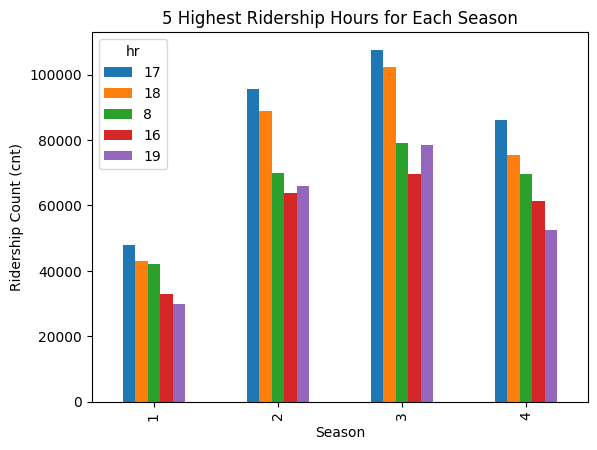

In [69]:
results.unstack().plot(kind='bar')
plt.title("5 Highest Ridership Hours for Each Season")
plt.xlabel("Season")
plt.ylabel("Ridership Count (cnt)")
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Bar chart di atas mengelompokkan 5 besar jam sibuk berdasarkan musim yang dilalui. Terdapat sebuah tren di mana jam 8, 16, 17, 18, dan 19 secara konsisten menjadi waktu dengan pengendara terbanyak. Pengendara lebih menikmati menggunakan rental pada jam 17 secara konsisten di seluruh musim. Adapun musim gugur memiliki jumlah pelanggan terbanyak dengan musim semi memiliki jumlah terkecil